In [1]:
import pandas as pd
import numpy as np


In [3]:
import os
def list_files(startpath):
    dircount = 0
    filecount = 0
    for root, dirs, files in os.walk(startpath):
        dircount += len(dirs)
        filecount += len(files)
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print("D"+'{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
    print("{} files in {} folders".format(filecount, dircount))

list_files('./Data Drive 1')

DData Drive 1/
D    Defects_X7/
D    MC-5/
D        RTB6O0EMA3AJ1 295_90 R 20  EMA-D/
D        RTB6R0ELD1AJ1 295_90R20 ELD/
D    MC-6/
D        RTB6O0EMA3AJ1 295_90 R 20  EMA-D/
D        RTB6R0ELD1AJ1 295_90R20 ELD/
D            NCT2/
D            OK/
D        RTBJBHELD9AK1 10 R20 ELD/
D            NCT2/
D            OK/
D    MC-7/
D        RTB6O0EMA3AJ1_295_90 R 20  EMA-D/
D            OK/
D        RTB6R0ELD1AJ1_295_90R20 ELD/
D            OK/
D        RTBJBHELD9AK1_10 R20 ELD/
D            NCT2/
D            OK/
D    RTB6O0EMA3AJ1_defect_tyres/
D        Blow/
D            X5/
D            X6/
D            X8/
D            X9/
D        FM/
D            X5/
D            X6/
D            X8/
D            X9/
D    RTBJBHELD9AK1_Blow_defect_tyres/
D        X5/
D        X6/
D        X8/
D        X9/
D    RTBJBHELD9AK1_fm_defect_tyres/
D        X5/
D        X6/
D        X8/
D        X9/
D    RTBJBHEM32AK1_defect_tyres/
D        Blow/
D            x5/
D            x6/
D            x8/
D     

In [4]:
list_files('./Data Drive 2')

DData Drive 2/
D    Bodyply Spacing/
D    Bp stetch/
444 files in 2 folders


In [5]:
list_files('./Data Drive 2/Bodyply Spacing')

DBodyply Spacing/
220 files in 0 folders


In [15]:
from PIL import Image

list_of_dimentions= []

im = Image.open('./Data Drive 2/Bodyply Spacing/2021-11-15 21-27-12 - recRTB6R0EML1AJ1 - 8310257379_Az0.00_Undef.tif')
width, height = im.size
list_of_dimentions += [str(width) + ' x ' + str(height)]

print(list_of_dimentions)

['3344 x 8475']


In [31]:
from pathlib import Path


list_of_dimentions= []
max_width = 0
max_height = 0

pathlist = Path('./Data Drive 2/Bodyply Spacing/').rglob('*.tif')
for path in pathlist:
     path_in_str = str(path)
     im = Image.open('./' + path_in_str.replace('\\', "/"))
     width, height = im.size
     list_of_dimentions += [str(width) + ' x ' + str(height)]
     if width > max_width:
          max_width = width
     
     if height > max_height & height != 10019:
          max_height = height
      

print(len(list_of_dimentions))
print(max_height)
print(max_width)

220
8475
3455


<AxesSubplot:title={'center':'Distribution of image dimentions'}>

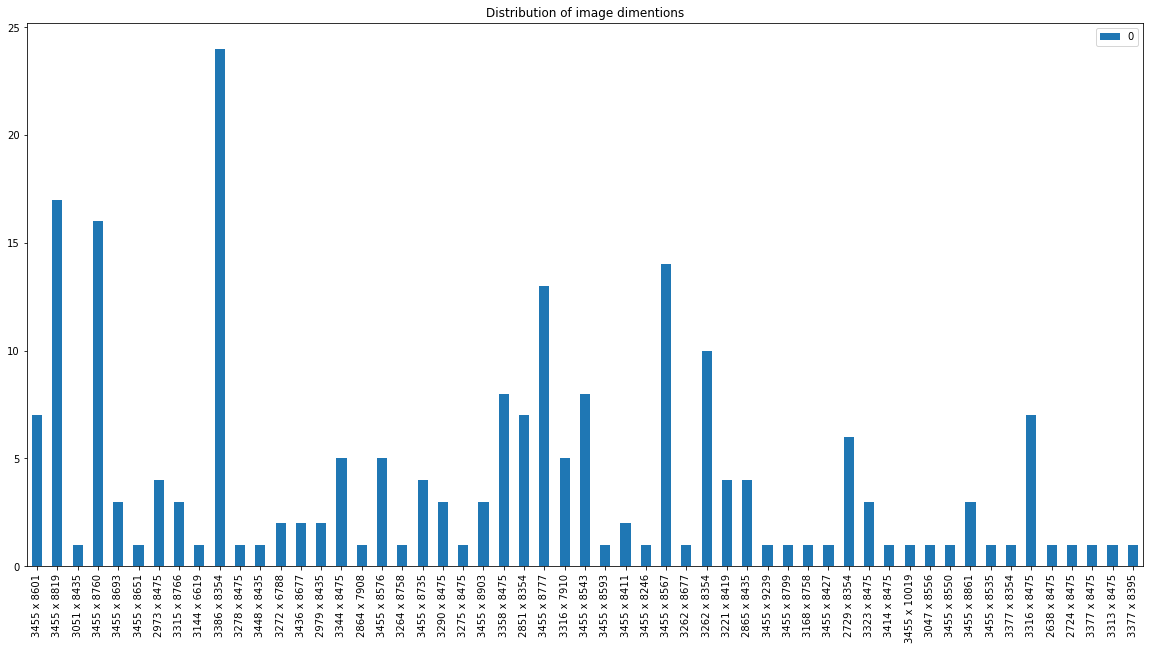

In [34]:
import pandas
from collections import Counter

dimention_count = Counter(list_of_dimentions)
df = pandas.DataFrame.from_dict(dimention_count, orient='index')
df.plot(kind='bar', figsize=(20, 10), title="Distribution of image dimentions")

# Decide on the final dimention of 3455 x 8475

In [37]:
def dimention_counter(path):
     list_of_dimentions= []
     max_width = 0
     max_height = 0

     pathlist = Path(path).rglob('*.tif')
     for path in pathlist:
          path_in_str = str(path)
          im = Image.open('./' + path_in_str.replace('\\', "/"))
          width, height = im.size
          list_of_dimentions += [str(width) + ' x ' + str(height)]
          if width > max_width:
               max_width = width
          
          if height > max_height:
               max_height = height

     dimention_count = Counter(list_of_dimentions)
     df = pandas.DataFrame.from_dict(dimention_count, orient='index')
     df.plot(kind='bar', figsize=(20, 10), title="Distribution of .tif image dimentions")

     print("processed " + str(len(list_of_dimentions)) + " images")
     print("The max height was " + str(max_height))
     print("The max width was " + str(max_width))

processed 220 images
The max height was 10019
The max width was 3455


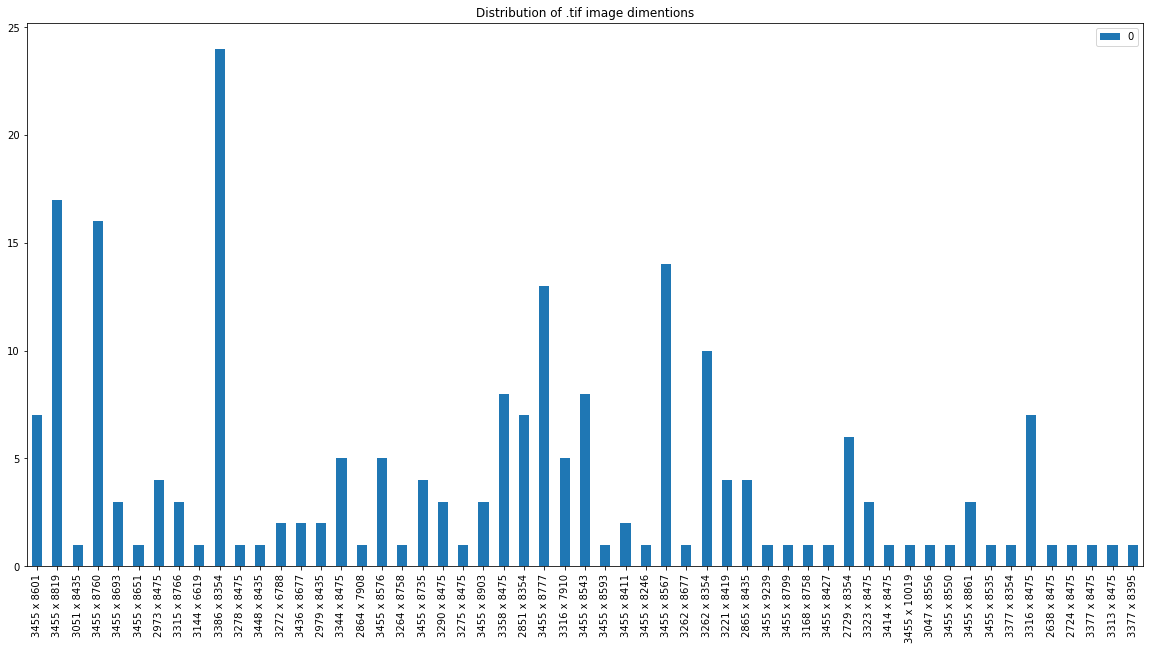

In [38]:
dimention_counter('./Data Drive 2/Bodyply Spacing/')

processed 223 images
The max height was 10019
The max width was 3455


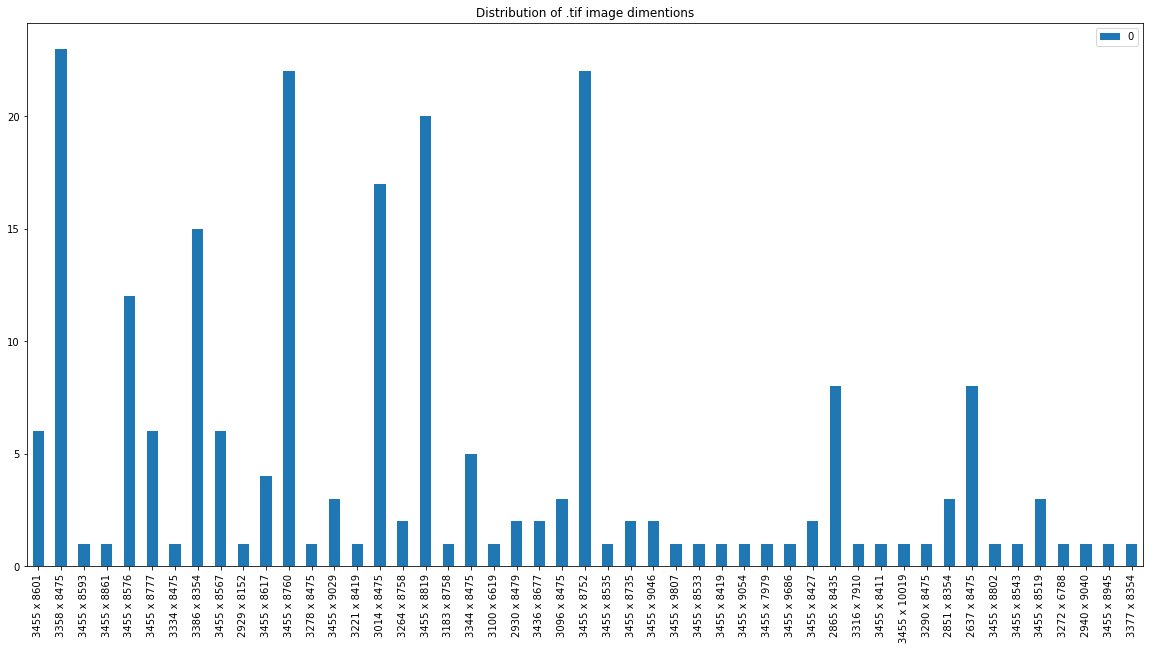

In [40]:
dimention_counter('./Data Drive 2/Bp stetch')

processed 1386 images
The max height was 8777
The max width was 3455


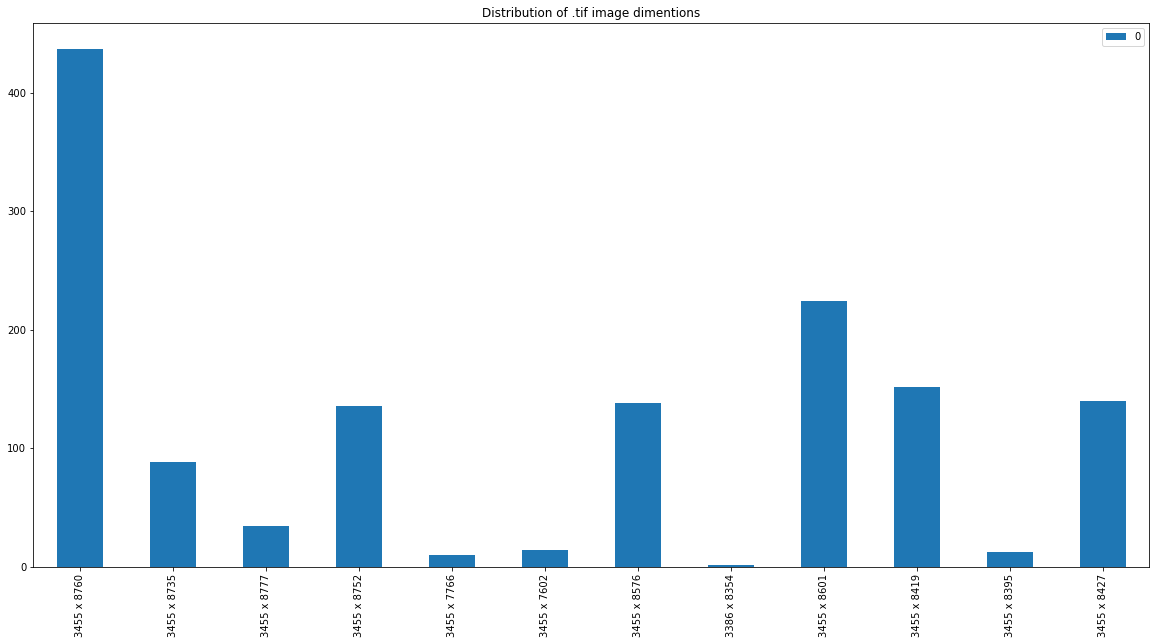

In [42]:
dimention_counter('./Data Drive 1')


processed 443 images
The max height was 10019
The max width was 3455


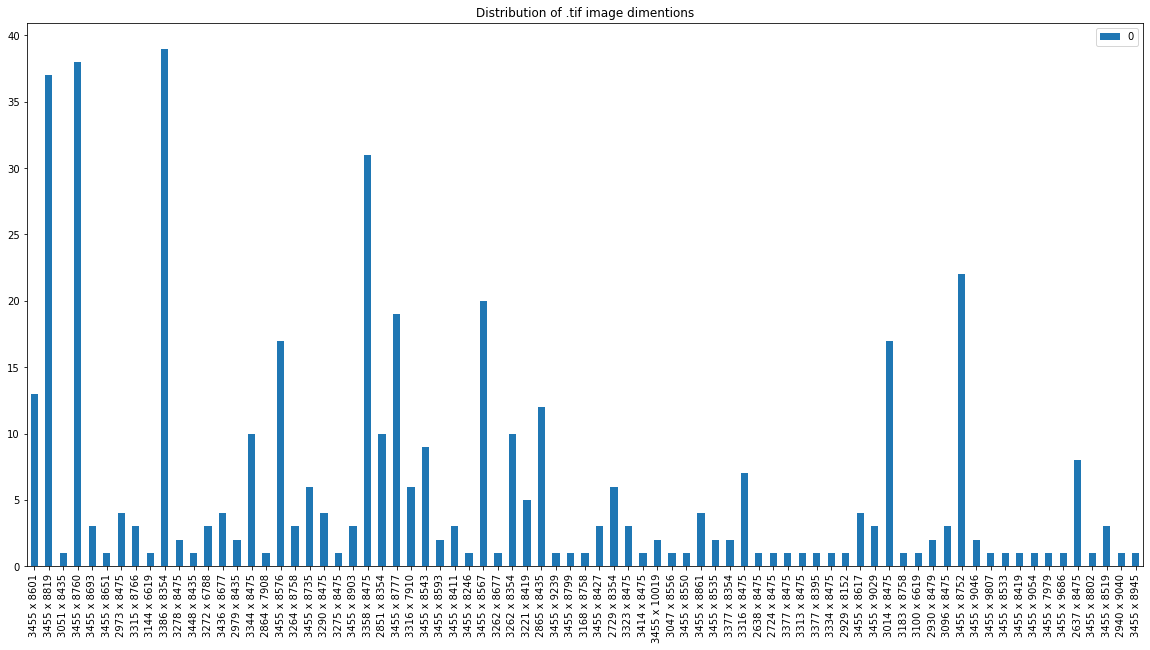

In [43]:
dimention_counter('./Data Drive 2')